In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [806]:
df = pd.read_csv('data_after_missing_value_treatment.csv')

In [807]:
df.sample(5)

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
1778,orchid petals,flat,sector 49,2.35,11559.0,3,3,3,15.0,Relatively New,2030.000000,0,0,0,0,1,0,49
868,bestech park view ananda,flat,sector 81,1.35,7541.0,3,3,3+,8.0,Old Property,1978.750756,0,0,0,0,0,0,114
2814,smart world orchard,flat,sector 61,2.50,16139.0,3,3,1,1.0,Under Construction,1549.000000,0,0,0,0,0,0,61
1276,experion windchants,flat,sector 112,5.31,11204.0,4,6,3+,15.0,Relatively New,3573.330000,0,1,0,0,0,0,72
3467,godrej oasis,flat,sector 88a,1.50,8108.0,3,3,3+,11.0,New Property,1641.415763,0,0,0,0,0,0,39


In [808]:
df.head()

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
0,paras dews,flat,sector 106,1.20,11605.0,3,3,3,12.0,Relatively New,1145.000000,1,0,0,0,0,0,158
1,railway officers rpf society,flat,sector 9a,1.25,6921.0,4,3,3,1.0,Old Property,1994.777045,0,1,0,0,0,0,40
2,umang winter hills,flat,sector 77,0.86,6408.0,2,2,2,16.0,New Property,1186.324045,0,0,0,0,0,1,79
3,godrej nature plus,flat,sector 33 road,1.35,8670.0,3,2,3+,17.0,New Property,1378.931760,0,0,0,0,0,0,38
4,dlf the ultima,flat,sector 81,2.21,10365.0,3,3,3+,3.0,Relatively New,1866.283075,0,1,0,0,0,2,149


In [809]:
train_df = df.drop(columns = ['society', 'price_per_sqft'])

In [810]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
0,flat,sector 106,1.20,3,3,3,12.0,Relatively New,1145.000000,1,0,0,0,0,0,158
1,flat,sector 9a,1.25,4,3,3,1.0,Old Property,1994.777045,0,1,0,0,0,0,40
2,flat,sector 77,0.86,2,2,2,16.0,New Property,1186.324045,0,0,0,0,0,1,79
3,flat,sector 33 road,1.35,3,2,3+,17.0,New Property,1378.931760,0,0,0,0,0,0,38
4,flat,sector 81,2.21,3,3,3+,3.0,Relatively New,1866.283075,0,1,0,0,0,2,149


<Axes: >

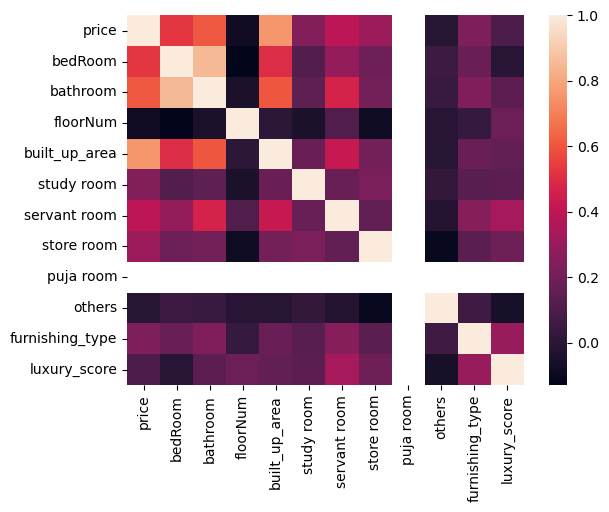

In [811]:
sns.heatmap(train_df.select_dtypes(include='number').corr())

In [812]:
train_df.select_dtypes(include = 'number').corr()['price'].sort_values(ascending = False)

price              1.000000
built_up_area      0.754155
bathroom           0.603337
bedRoom            0.524912
servant room       0.393572
store room         0.307615
study room         0.245309
furnishing_type    0.229142
luxury_score       0.097578
others            -0.012216
floorNum          -0.084771
puja room               NaN
Name: price, dtype: float64

### Converting luxury score column into a categorical column

<Axes: ylabel='luxury_score'>

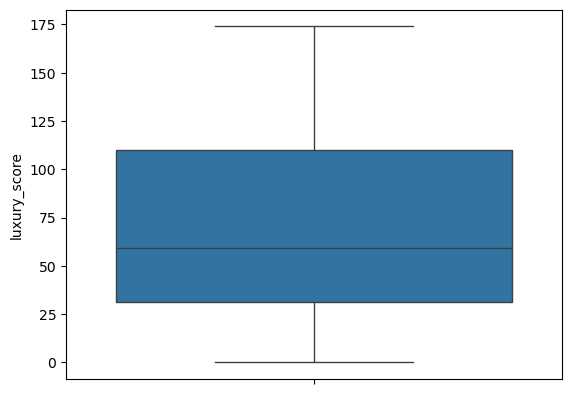

In [814]:
sns.boxplot(df['luxury_score'])

In [815]:
# Making three categories
# Budget, semi luxury, luxury

def categorize_luxury(score):
    if 0<= score<50:
        return 'Low'
    elif 50 <= score < 150:
        return 'Medium'
    elif 150<= score <= 175:
        return 'High'
    else:
        return None

In [816]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [817]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 106,1.20,3,3,3,12.0,Relatively New,1145.000000,1,0,0,0,0,0,158,High
1,flat,sector 9a,1.25,4,3,3,1.0,Old Property,1994.777045,0,1,0,0,0,0,40,Low
2,flat,sector 77,0.86,2,2,2,16.0,New Property,1186.324045,0,0,0,0,0,1,79,Medium
3,flat,sector 33 road,1.35,3,2,3+,17.0,New Property,1378.931760,0,0,0,0,0,0,38,Low
4,flat,sector 81,2.21,3,3,3+,3.0,Relatively New,1866.283075,0,1,0,0,0,2,149,Medium


### Floornum to categories

<Axes: ylabel='floorNum'>

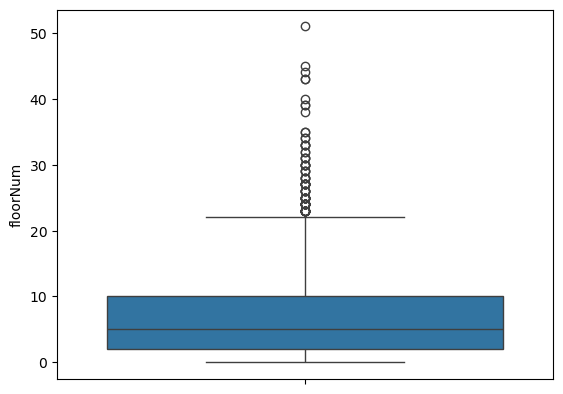

In [819]:
sns.boxplot(df['floorNum'])

In [820]:
def categorize_floor(floor):
    if 0<= floor<=2:
        return 'Low Floor'
    elif 3<= floor <= 10:
        return 'Mid Floor'
    elif 11 <= floor<=51:
        return 'High Floor'
    else:
        return None

In [821]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [822]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 106,1.20,3,3,3,12.0,Relatively New,1145.000000,1,0,0,0,0,0,158,High,High Floor
1,flat,sector 9a,1.25,4,3,3,1.0,Old Property,1994.777045,0,1,0,0,0,0,40,Low,Low Floor
2,flat,sector 77,0.86,2,2,2,16.0,New Property,1186.324045,0,0,0,0,0,1,79,Medium,High Floor
3,flat,sector 33 road,1.35,3,2,3+,17.0,New Property,1378.931760,0,0,0,0,0,0,38,Low,High Floor
4,flat,sector 81,2.21,3,3,3+,3.0,Relatively New,1866.283075,0,1,0,0,0,2,149,Medium,Mid Floor


In [823]:
train_df.drop(columns = ['floorNum','luxury_score','puja room'], inplace = True)

In [824]:
train_df.to_csv('data for model selection for price prediction_without encoding.csv', index = False)

In [825]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 106,1.20,3,3,3,Relatively New,1145.000000,1,0,0,0,0,High,High Floor
1,flat,sector 9a,1.25,4,3,3,Old Property,1994.777045,0,1,0,0,0,Low,Low Floor
2,flat,sector 77,0.86,2,2,2,New Property,1186.324045,0,0,0,0,1,Medium,High Floor
3,flat,sector 33 road,1.35,3,2,3+,New Property,1378.931760,0,0,0,0,0,Low,High Floor
4,flat,sector 81,2.21,3,3,3+,Relatively New,1866.283075,0,1,0,0,2,Medium,Mid Floor


In [826]:
# Cols in doubt to remove 
# numerical -> luxury_category, others, floor_category
# categorical -> property_type, sector, agepossession

In [827]:
from sklearn.preprocessing import OrdinalEncoder

# create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include = ['object']).columns

In [828]:
#apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 33 road', 'sector 36', 'sector 36 road',
       'sector 36a', 'sector 37', 'sector 37c', 'sector 37d', 'sector 38',
       'sector 39', 'sector 4', 'sector 40', 'sector 41', 'sector 43',
       'sector 45', 'sector 46', 'sector 47', 'sector 48', 'sector 49',
       'sector 5', 'sector 

In [829]:
# splitting dataset into training and testing sets
x_label = data_label_encoded.drop('price', axis = 1)
y_label = data_label_encoded['price']

In [830]:
x_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,others,furnishing_type,luxury_category,floor_category
0,0.0,10.0,3,3,3.0,3.0,1145.000000,1,0,0,0,0,0.0,0.0
1,0.0,114.0,4,3,3.0,2.0,1994.777045,0,1,0,0,0,1.0,1.0
2,0.0,91.0,2,2,2.0,1.0,1186.324045,0,0,0,0,1,2.0,0.0
3,0.0,42.0,3,2,4.0,1.0,1378.931760,0,0,0,0,0,1.0,0.0
4,0.0,96.0,3,3,4.0,3.0,1866.283075,0,1,0,0,2,2.0,2.0


### Feature selection Technique-1 (Correlation analysis)

<Axes: >

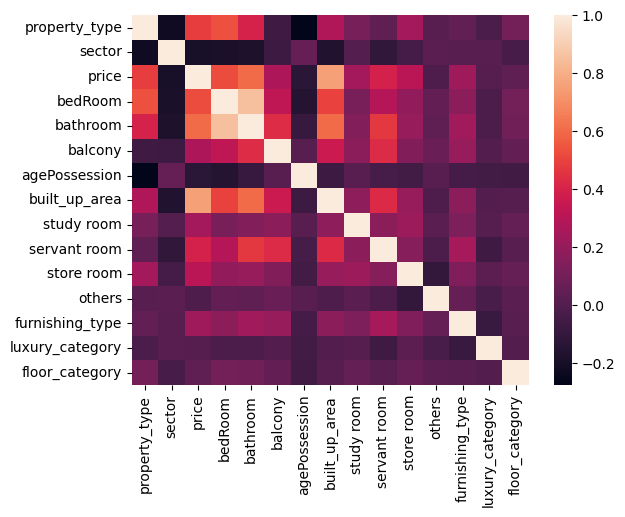

In [832]:
sns.heatmap(data_label_encoded.corr())

In [833]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns = {'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.193409
1,price,1.000000
2,bedRoom,0.524912
3,bathroom,0.603337
4,balcony,0.270717
5,agePossession,-0.131341
6,built_up_area,0.754155
7,study room,0.245309
8,servant room,0.393572
9,store room,0.307615


### Technique 2- Random forest Feature Importance

In [835]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_label.fit(x_label,y_label)

# Extract feature importance scores for label encoded data

fi_df2 = pd.DataFrame({
    'feature':x_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by = 'rf_importance',ascending = False)

fi_df2

,feature,rf_importance
6,built_up_area,0.661094
1,sector,0.107094
0,property_type,0.093533
3,bathroom,0.024578
2,bedRoom,0.022655
8,servant room,0.019692
5,agePossession,0.014240
4,balcony,0.013119
11,furnishing_type,0.010384
7,study room,0.009290


### Technique-3 Gradient Boosting Feature Importances

In [837]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on Label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label, y_label)

GradientBoostingRegressor()

In [838]:
# Extract Feature importance score for label encoded data

fi_df3 = pd.DataFrame({
    'feature':x_label.columns,
    'gb_importance':gb_label.feature_importances_
}).sort_values(by = 'gb_importance', ascending = False)

fi_df3
    

,feature,gb_importance
6,built_up_area,0.700388
1,sector,0.105339
0,property_type,0.085565
3,bathroom,0.039474
8,servant room,0.023464
2,bedRoom,0.017295
9,store room,0.012720
7,study room,0.005246
5,agePossession,0.004662
11,furnishing_type,0.002783


### Technique-4 (Permutation importance)

In [840]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train_label, x_test_label, y_train_label, y_test_label = train_test_split(x_label, y_label, test_size = 0.2, random_state = 42)

In [841]:
# training a RF Regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_label.fit(x_train_label, y_train_label)

RandomForestRegressor(random_state=42)

In [842]:
# Calculate permutation importance
perm_importance = permutation_importance(rf_label, x_test_label, y_test_label, n_repeats = 30, random_state = 42)

In [843]:
# Organize resluts into dataframa

fi_df4 = pd.DataFrame({
    'feature':x_label.columns,
    'permutation_importance':perm_importance.importances_mean
}).sort_values(by = 'permutation_importance', ascending = False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.738048
0,property_type,0.189809
1,sector,0.154275
2,bedRoom,0.021598
3,bathroom,0.013122
8,servant room,0.011532
7,study room,0.009424
13,floor_category,0.002234
4,balcony,0.000832
10,others,0.000325


### Technique-5 LASSO

In [845]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

In [846]:
#Train the lasso model
lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(x_scaled, y_label)

Lasso(alpha=0.01, random_state=42)

In [847]:
# Extract coeffcients
fi_df5 = pd.DataFrame({
    'feature':x_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by = 'lasso_coeff',ascending = False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.544211
0,property_type,0.755445
3,bathroom,0.448818
9,store room,0.211228
7,study room,0.180230
11,furnishing_type,0.175039
8,servant room,0.147421
12,luxury_category,0.058192
5,agePossession,-0.000000
13,floor_category,-0.005403


### Technique-6 RFE (Recursice Feature elimination)

In [849]:
from sklearn.feature_selection import RFE

# initiate the base estimator
estimator = RandomForestRegressor()

In [850]:
# Apply RFE on the label- encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select = x_label.shape[1], step =1)
selector_label = selector_label.fit(x_label, y_label)

# Get the selectoed features based in RFE
selected_features = x_label.columns[selector_label.support_]

In [851]:
# Extracting the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

In [852]:
#Organize the result into a dataframe

fi_df6 = pd.DataFrame({
    'feature':selected_features,
    'rfe_score':selected_coefficients
}).sort_values(by = 'rfe_score', ascending = False)

fi_df6

,feature,rfe_score
6,built_up_area,0.657650
1,sector,0.104809
0,property_type,0.094852
2,bedRoom,0.024674
3,bathroom,0.024258
8,servant room,0.020865
4,balcony,0.012814
5,agePossession,0.012583
7,study room,0.011952
11,furnishing_type,0.011603


### Techniques-7 Linear regression weights

In [854]:
# Train a linear regression model on the label encidea nd standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_scaled,y_label)

LinearRegression()

In [855]:
# Extract coefficients

fi_df7 = pd.DataFrame({
    'feature':x_label.columns,
    'reg_coeffs':lin_reg.coef_
}).sort_values(by = 'reg_coeffs', ascending = False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.545572
0,property_type,0.773594
3,bathroom,0.524573
9,store room,0.215162
7,study room,0.188199
11,furnishing_type,0.184438
8,servant room,0.148083
12,luxury_category,0.068931
5,agePossession,-0.006661
13,floor_category,-0.015717


### Technique 8 (SHAP)

In [857]:
!pip install shap
# Explainable AI me shap padhte hai

In [858]:
import shap

In [ ]:
# Compute SHAP values using the trained Random Forest Model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)

In [ ]:
# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': x_label.columns,
    'SHAP_score':np.abs(shap_values).mean(axis=0)
}).sort_values(by = 'SHAP_score', ascending = False)
fi_df8

In [ ]:
final_fi_df = fi_df1.merge(fi_df2, on = 'feature').merge(fi_df3, on = 'feature').merge(fi_df4, on = 'feature').merge(fi_df5, on = 'feature').merge(fi_df6, on = 'feature').merge(fi_df7, on = 'feature').merge(fi_df8, on = 'feature').set_index('feature')

In [ ]:
final_fi_df

In [ ]:
# Normalizing all columns
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis = 0), axis = 1)

In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis = 1).sort_values(ascending = False)

In [ ]:
# To drop study rooms and others colum because of less feature importance
# But will have to check whether it is actually irrelevant or not
# Training a random forest and calculation R2score

In [ ]:
x_label

In [ ]:
# Training RF with all columns
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators = 100, random_state  = 42)

scores = cross_val_score(rf, x_label, y_label, cv = 5, scoring = 'r2')

In [ ]:
scores.mean()

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
scores = cross_val_score(rf, x_label.drop(columns = ['study room', 'others']), y_label, cv = 5, scoring = 'r2')

In [ ]:
scores.mean()

In [ ]:
export_df = data_label_encoded.drop(columns = ['study room', 'others'])

In [ ]:
export_df.to_csv('data for price prediction model.csv', index = False)

In [ ]:
export_df